In [37]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats

# Linear regression with gradient descent

Linear regression is often introduced as a first machine learning project.  The reasons for this are straight forward- most people understand it intuitively, it can be compared against the least squares method of linear regression, and it provides a solid foundation to introduce terminology.

Here, we will introduce the linear regression problem; then through the lens of that problem introduce the concept of an error function and discuss gradient descent.  Lastly, we will solve a linear regression problem, and compare the solution to a least square method.

First, let's consider a set of points

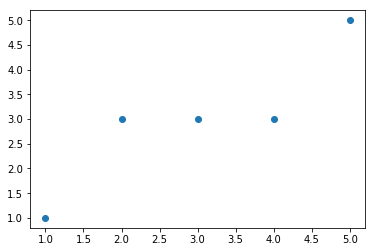

In [38]:
X = np.array([1,2,3,4,5])
X = X.astype(float)
Y = np.array([1,3,3,3,5])
Y = Y.astype(float)
plt.plot(X,Y,'o')
plt.show()

Remember, the essence of machine learning is to take known inputs/outputs and use it to predict outputs of new inputs.  Here, we have 5 known inputs, and 5 known outputs.  Our goal is to predict new outputs, and we assume that the outputs are linearly related to the inputs.  That is, we assume y = mx + b.

Before we continue, let's formalize the problem to a more generic form.  The image below shows four equations, EQ 1 and EQ 2 are ways to represent the output.  We assume Y is a result of matrix multiplication with a the unknown vector B and the known input vector X.  EQ 3 is kind of weird, but important.  In order for the matrix multiplication to work out, X can not be the single-entry of x, but rather a vector consisting of x  and 1.  Lastly, we define B as a 2-element vector.

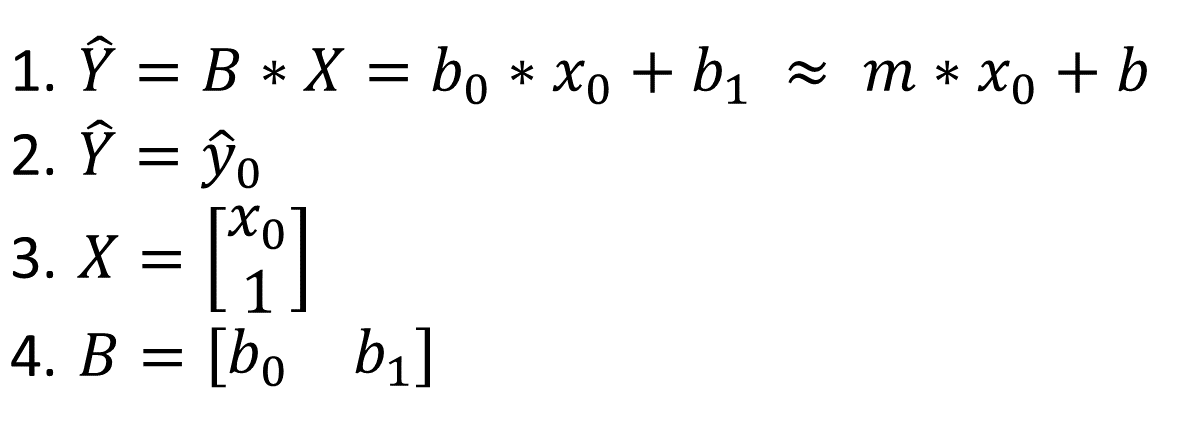

In [39]:

Image(filename='linr1.png') 

The challenge is now to decide which m and b are "best".

Let's start with a random value for m and b.  Say, .48 and .75.  What happens if we plot that line?

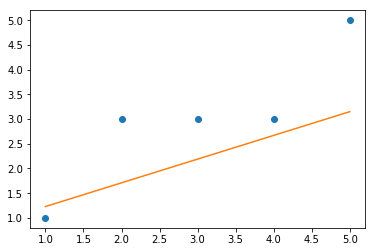

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
X = X.reshape(5,1)
B = np.array([.48,.75])
j=0
yg = Y.copy() #y guess
X = np.hstack((X,np.ones(X.shape))) #necessary for matrix math
while j < len(X): #for every element in X
    yg[j] = np.dot(B,X[j])
    j=j+1
    
plt.plot(X[:,0],Y,'o')
plt.plot(X[:,0],yg,'-')
plt.show()

Not a great fit, but it gives us a starting point.  We can now modify m and b to reduce the error.  Except we don't yet know what we mean by "error!" Consider EQ 5, and EQ 6.  

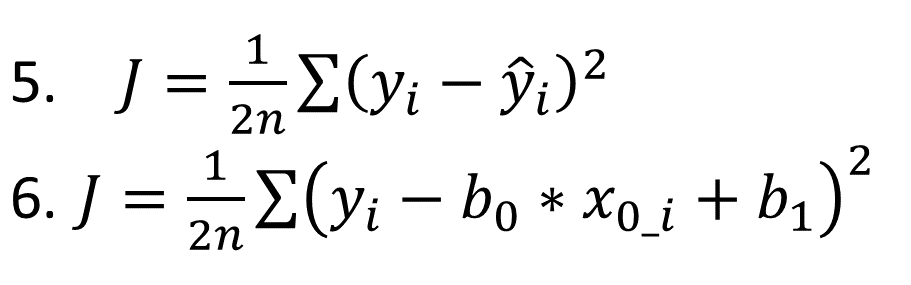

In [41]:
Image(filename='linr2.png') 

These equations are really just one equation, but in different form.  This is the error function that we've selected; other error functions exist, but this is the one we will use for now (in practice, it may be a good idea to test out different error functions).  That is, this equation represents the error between our actual Y and our guess for Y, or Y_guess.

 

# Gradient descent
In the world of mathematics, the gradient is a multivariate analog to the 1-D derivative.  So, let's consider the one 1-D derivative, and the concept of "derivative descent." Consider the plot of a quadratic function.  Let's say we wanted to find the minimum of that function.

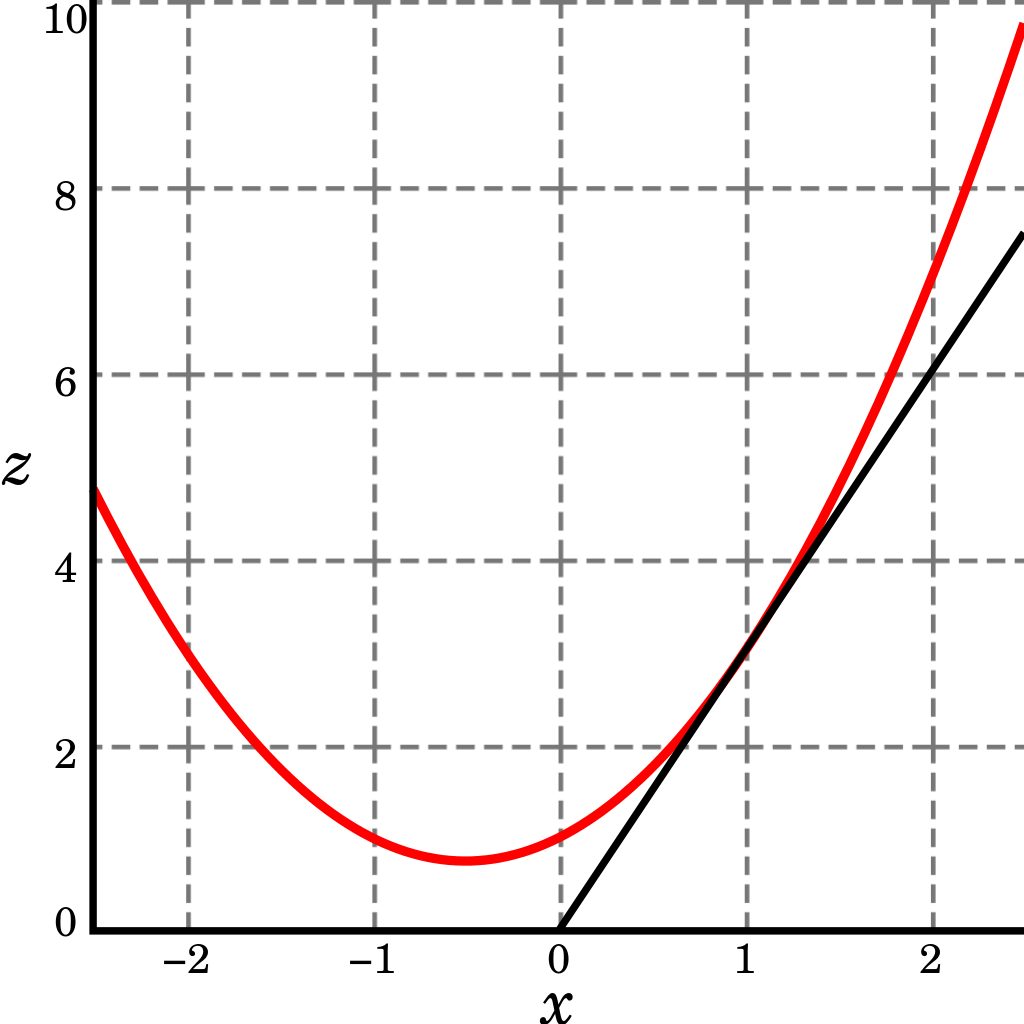

In [42]:
Image(filename='linr3.png') 

One way to do this is to recreate the function in real life, and place a ball bearing on the surface.  If we placed the ball at (2,8),  then it would drop a bit, until it hit the surface, then roll downwards towards (eyeballing) the point (0,1).  Momentum would keep it going until it got to a higher point (where PE and KE balance out, but that's a whole 'nother bag of worms!), and it would roll back and forth until it settled at the "bottom" of our surface (around (-.5,1)).  This is the essence of gradient descent!

 

With 2 parameters to test (m and b, or b0 and b1), our surface would be closer to a bowl. 

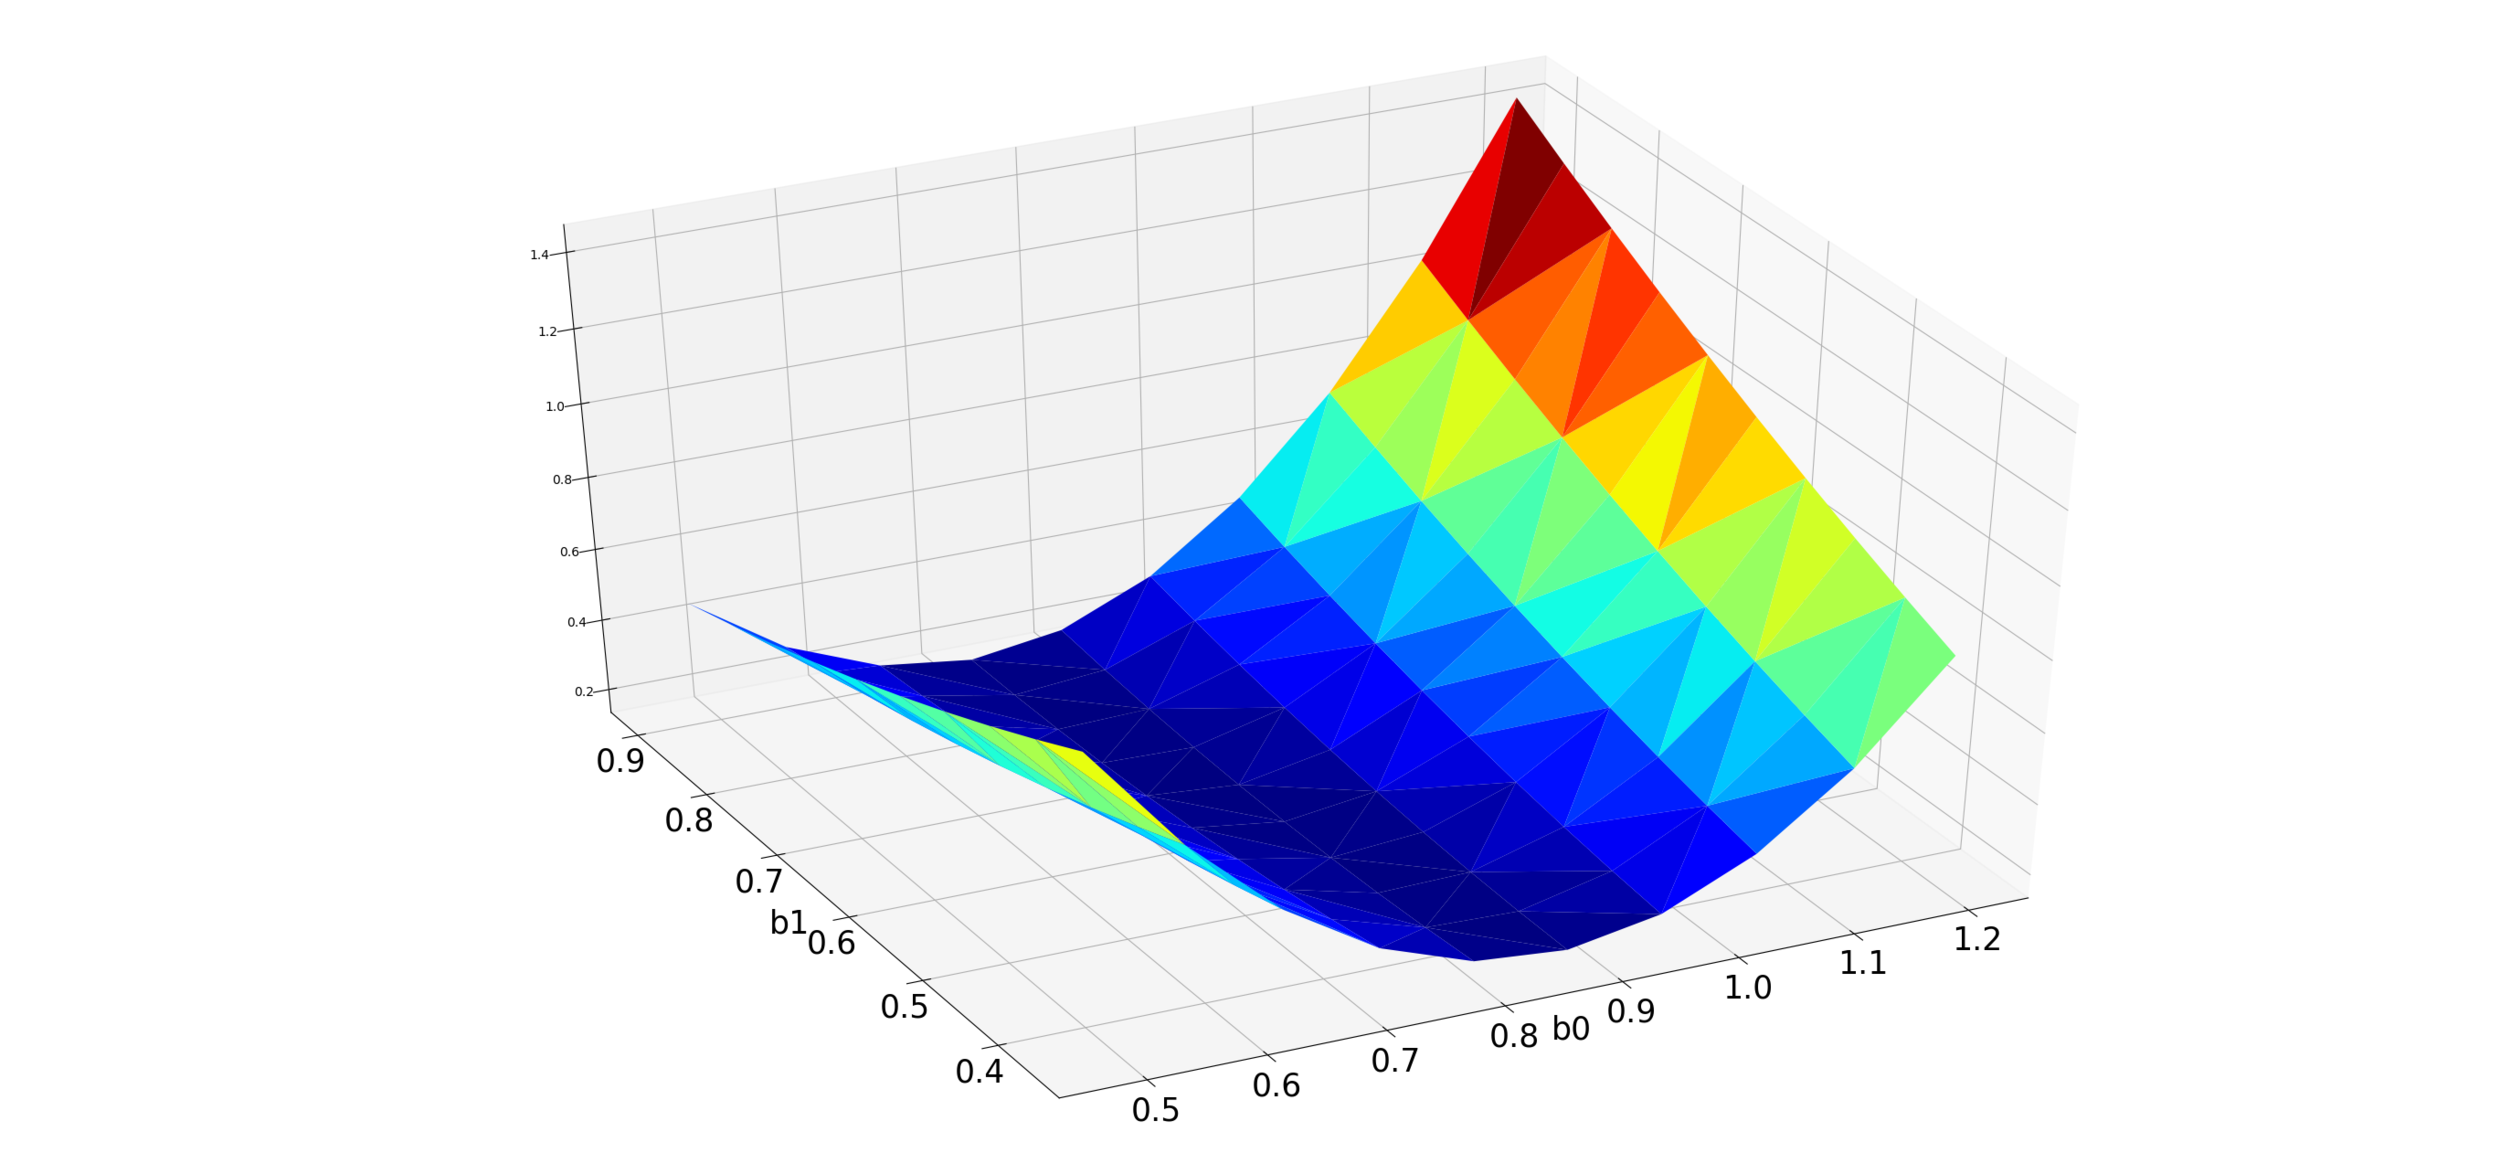

In [43]:
Image(filename='linr4.png') 

Our error functions surface is a strangely shaped bowl.  Since we used nice functions, it's only got one "bottom."  Advanced users can challenge themselves to recreate a similar plot.

Dropping a ball bearing would result in it rolling to the minimum in both dimensions!

More formally, the gradient of f(x,y,z) is 

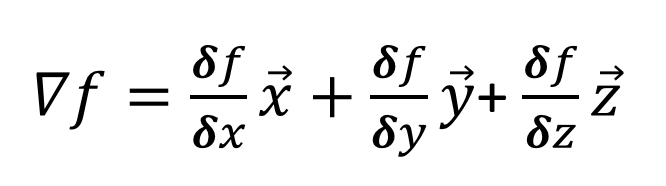

In [53]:
Image(filename='linr5.png') 

This equation is a set of vectors consisting of partial derivatives pointing in the direction of the major axes.  In our case, the axes are b0 and b1.

# What does this have to do with linear regression?!
So, let's tie together the concept of gradient descent and linear regression.  The 3D plot above showing the surface with X, and Y labels of b0 and b1 is the error plot of our linear regression.  That is, since b0 corresponds to m and since b1 corresponds to b, and since we are trying to find the "best" m and b, if we let the Z axis corresponds to the error between Y and Y_guess (which by EQ 5 is a function of m and b),  then a minimum of that function will minimize the error.  So we really just need to "drop a ball" on the above surface, and see where it ends up.

 

The formal way of doing this is known as gradient descent.  We choose a random point (maybe (m,b) = (b0,b1) = (.48,.75) for example?) And calculate (with partial derivatives) the gradient of the error function. And find the direction of fastest descent.

If we take a baby step in that direction, then the position of the marble can be represented as EQ 6 through EQ 8.  This notation is a bit confusing.  i represents the index of B (from EQ 4).  So our partial derivative needs to be calculated every time we change axes (in this case it's only b0 and b1, or m and b.)

Note that α corresponds to a rate of change, or step size.  That is, once we determine the direction of steepest descent, we could take a big step or a little step in that direction.  This is a hyperparameter that we can tune.

Readers should convince themselves rigorously that EQ 7 and EQ 9 are the same (that is, for our error function, the partial derivative in the direction of bi is as stated).
So now we can update B in the "best" manner.  If we do this iteratively, then B will be changed by those little α steps.  Here is the plot of Y after 10, 100, and 1000 steps.

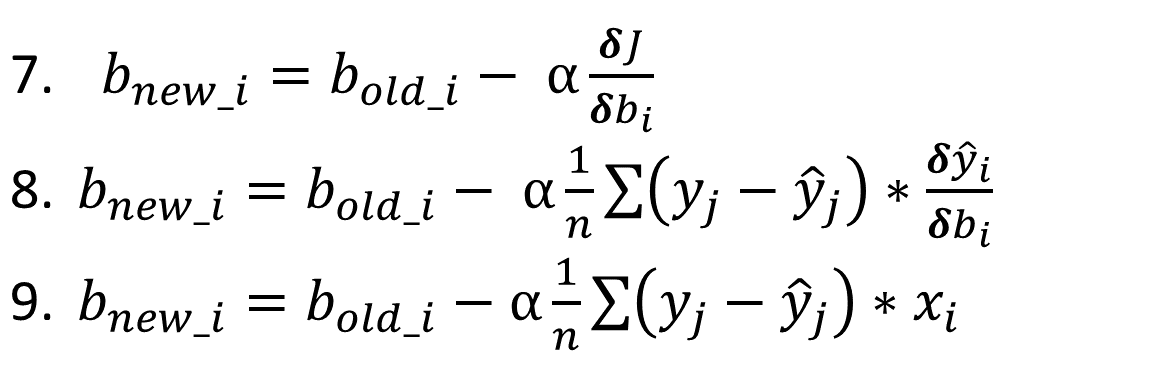

In [45]:
Image(filename='linr6.png') 

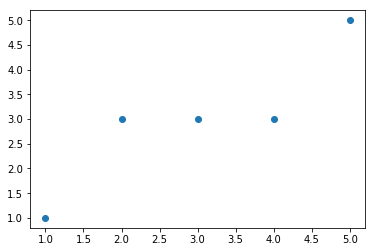

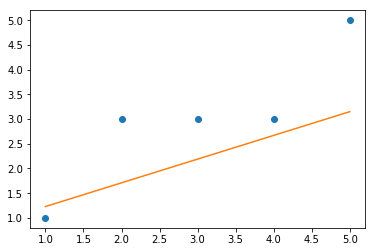

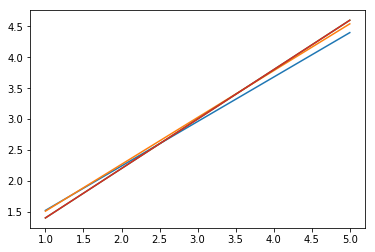

In [46]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats


X = np.array([1,2,3,4,5])
X = X.astype(float)
Y = np.array([1,3,3,3,5])
Y = Y.astype(float)
plt.plot(X,Y,'o')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
X = X.reshape(5,1)
B = np.array([.48,.75])
j=0
yg = Y.copy() #y guess
X = np.hstack((X,np.ones(X.shape))) #necessary for matrix math
while j < len(X): #for every element in X
    yg[j] = np.dot(B,X[j])
    j=j+1
    
plt.plot(X[:,0],Y,'o')
plt.plot(X[:,0],yg,'-')
plt.show()


Bb = B
i=0
alpha = .01
while i < 1000:
    i=i+1
    j=0
    yg = Y.copy() #y guess
    while j < len(X): #for every element in X
        yg[j] = np.dot(B,X[j])
        j=j+1
    if i in [10,100,1000]: plt.plot(X[:,0],yg)
    Br = B.copy()
    k=0
    while k< len(B):
        foo = 2*np.multiply((yg-Y),X[:,k])
        Br[k] = Br[k] - alpha * (1/len(X)) * np.sum(foo)
        k=k+1
    B = Br
    
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0],Y)
while j < len(X): #for every element in X
    yg[j] = np.dot(B,X[j])
    j=j+1
plt.plot(X[:,0],yg,'-')    
plt.show()

You'll notice that I also plotted the least squares solution against our machine learning solution.  And more importantly, they aren't the same!  This is an important result of our choice of error function.

Least squares linear regression is performed by setting EQ 11 equal to zero.  EQ 11 is the partial derivative (in the direciton of m) of EQ 10, which represents the vertical error.

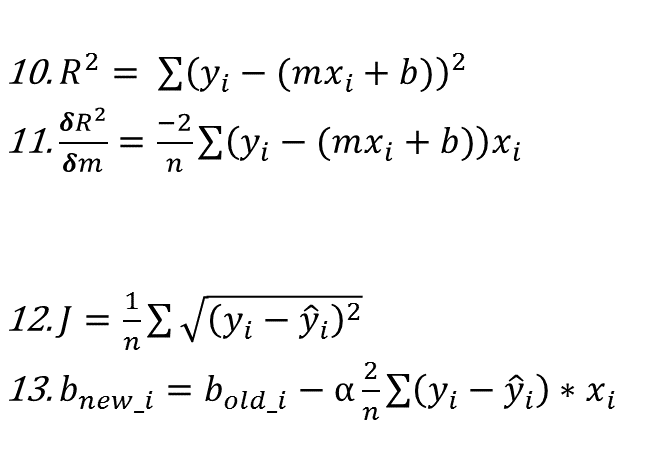

In [47]:
Image(filename='linr7.png') 

You'll notice our error function is almost the same as the squares vertical deviations (in our case, R^2) , it merely differs by 1/2.  If we remove that 1/2, our error function becomes EQ 12, and our gradient step is defined as EQ 13.

And if we plot the result of a few (a million is a few, right?) gradient descent steps, we see that our line now converges to the line corresponding to the least squares solution!  They solutions are similar enough that the lines seem to overlap.

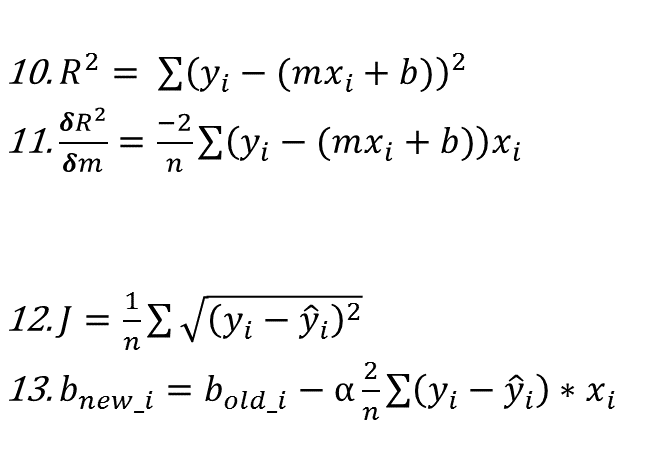

In [48]:
Image(filename='linr7.png') 

# Review
Here, we discussed linear regression and gradient descent.  We defined an error function J and discussed how to update our parameter array, B.  After several thousand updates we found a convergent solution, but noticed that it didn't match the solution from the least squares method.  We explored different choices of error functions, and saw how they affect our results.

Motivated users should see that the 'for' loops can be improved by creating a function to update B, and another function to calculate yg.

This writeup is meant as an introduction to the gradient descent technique.  It shows the basic concept in the machine learning discipline of iteratively minimizing error.  Since we had a "nice" error function, we avoided the pitfall of finding a local minimum instead of a global minimum.  We also did not use a train/test split, nor did we discuss changing our step size.  These are more advanced techniques that we can use to get more robust solutions against larger or more variable data.

 ∇δ
